# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [125, 315, 25]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,76237,3473,7102,16538,778,918
1,1479,14982,11924,662,3891,3508
2,16165,4230,7595,201,4003,57


In [4]:
# Check if the samples vary significantly
display(samples - data.mean().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,64237.0,-2323.0,-849.0,13466.0,-2103.0,-607.0
1,-10521.0,9186.0,3973.0,-2410.0,1010.0,1983.0
2,4165.0,-1566.0,-356.0,-2871.0,1122.0,-1468.0


In [5]:
display(samples - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,67733.0,-154.0,2346.0,15012.0,-38.0,-48.0
1,-7025.0,11355.0,7168.0,-864.0,3075.0,2542.0
2,7661.0,603.0,2839.0,-1325.0,3187.0,-909.0


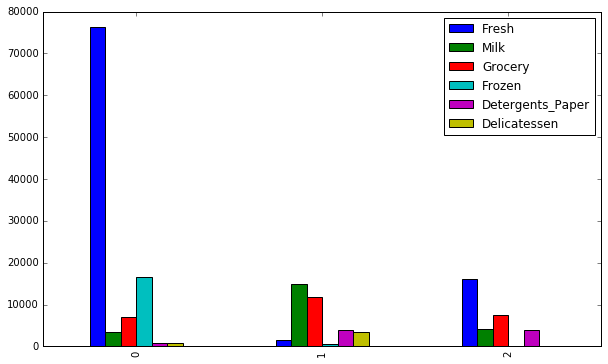

In [6]:
samples.plot(kind='bar', figsize=(10, 6))

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
125   99.8  47.7     63.4    98.2              48.6          48.6
315   13.4  93.4     79.5    23.6              74.8          93.2
25    73.4  56.0     65.2     7.0              75.5           4.3


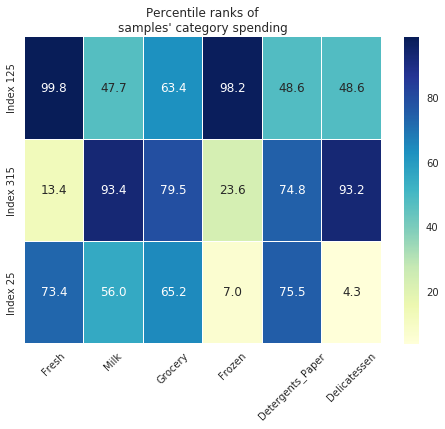

In [7]:
# idea for the code and visualization provided by the mentor in the review

import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

In [8]:
# Calculate the percentage of each category
samples_w_total = samples.copy()
samples_w_total['Total'] = samples_w_total.sum(axis=1)
samples_percentage = samples.loc[:,"Fresh":"Delicatessen"].div(samples_w_total['Total'], axis=0) * 100
samples_percentage['Total'] = samples_percentage.sum(axis=1)
samples_percentage

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,72.574872,3.306171,6.760848,15.743579,0.740628,0.873903,100.0
1,4.058058,41.107392,32.716896,1.816386,10.676069,9.625199,100.0
2,50.122477,13.115872,23.549657,0.623236,12.412018,0.176739,100.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

- The first customer in the sample appears to be an important chain or market that specializes in fresh products (72.5% of its purchases). With purchases of 76,237 of Fresh products (99.8 percentile) it appears to be an outlier, being far away from the mean + 3 standard deviations (around 50,000). Its purchases also reflect an important reliance of Frozen products (98.2 percentile), I can imagine these are mostly frozen fruits, vegetables or even fish. The small percentage of money this customer spends in Detergents_Paper (only 0.74% of its total) gives me the impression that they are using these products for internal use. 
- The second customer appears to be the "opposite" of the previous customer: it purchases a lot of Milk products (93.4 percentile), Grocery products (79.0 percentile), Detergents_Papers products (74.8 percentile), and Delicatessen products (93.2 percentile). In fact, these 4 categories represent almost 95% of this customer’s purchases, but only around 12% of the first customer's purchases. This customer looks more like the average supermarket, where people come to buy a little bit of everything. 
- Finally, the third customer appears to be somewhere between these two "extremes": it has above average purchases of both Fresh products (73.4 percentile) and Detergents_Paper (75.5 percentile). It could represent a hotel that has a restaurant but also has to clean many rooms, or a supermarket that, besides selling groceries, detergents, papers, etc., sells a lot of fresh products.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [9]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
column_to_study = 'Grocery'
X_all = new_data.drop(column_to_study, axis=1)
y_all = data[column_to_study]

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=10)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=10)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.723800832652


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict the value of the Grocery category. I thought this was an interesting feature to predict, as it appears to be the most generic one, where the "all other purchases" might grouped, meaning that it would be dependent on general spending of the customer. Effectively, the reported prediction score for this feature was 0.72, meaning that 72% of the variation in this feature can be explained by the variation of the other features. Most likely, the Grocery category will not be necessary for identifying customer's spending habits as most of this information can be obtained indirectly from the other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

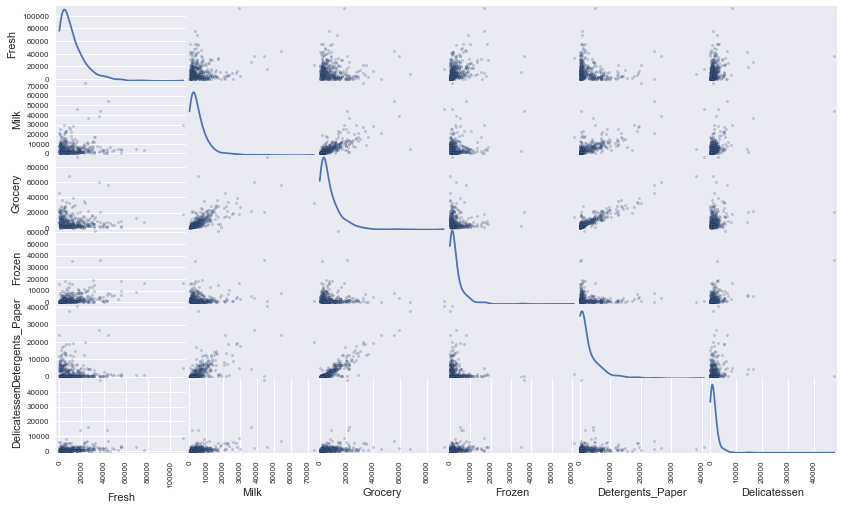

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The strongest correlation seems to be between Grocery and Detergents_Paper, although there also seems to be some correlation between Grocery and Milk, and even between Milk and Detergent. In general, this confirms my suspicion that the variation Grocery might actually be explained by the variation in other features, most likely by Detergents_Paper. 


There seems to be many outliers in the data, most likely accounting for big supermarket chains or big wholesalers, but most of the customers are small. This results in a data distribution that is not normal but skewed to the right (positively skewed).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

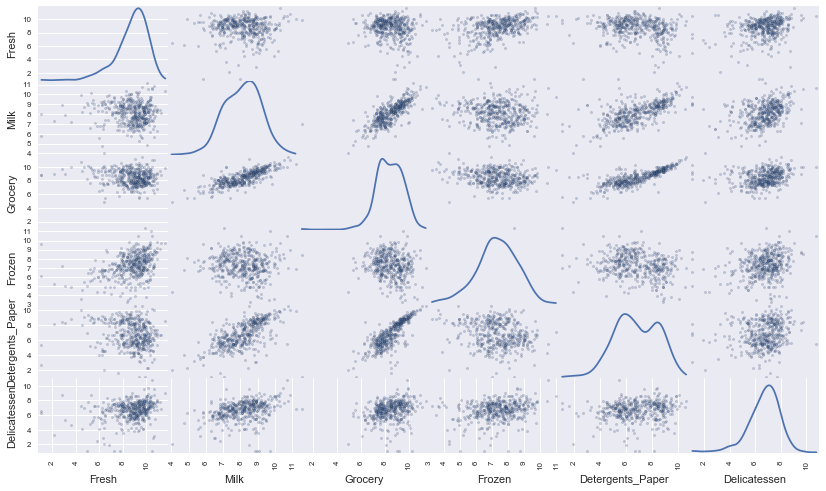

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.241602,8.152774,8.868132,9.713416,6.656727,6.822197
1,7.299121,9.614605,9.386308,6.495266,8.266421,8.162801
2,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values

all_outliers = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    df_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(df_outliers)
    
    # Append outliers to list
    all_outliers += list(df_outliers.index.values)

    
# ALL UNIQUE OUTLIERS, INCLUIDING THOSE REPEATED BETWEEN CATEGORIES
print "\nAll unique outliers (including repeated between categories):"
unique_outliers = list(set(all_outliers))
print unique_outliers

# ONLY OUTLIERS FOUND IN MORE THAN ONE CATEGORY
outliers_more_than_1_cat = list(set([x for x in all_outliers if all_outliers.count(x) > 1]))
print "\nOutliers found in more than ONE category:"
print outliers_more_than_1_cat

# ALL OUTLIERS EXCEPT THE ONES FOUND IN MORE THAN ONE CATEGORY
outliers_in_exactly_1_cat = list(set([x for x in all_outliers if all_outliers.count(x) == 1]))
print "\nOutliers that are NOT found in more than ONE category:"
print outliers_in_exactly_1_cat
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = unique_outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



All unique outliers (including repeated between categories):
[128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]

Outliers found in more than ONE category:
[128, 65, 66, 75, 154]

Outliers that are NOT found in more than ONE category:
[264, 137, 142, 145, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 193, 203, 325, 289, 183, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]


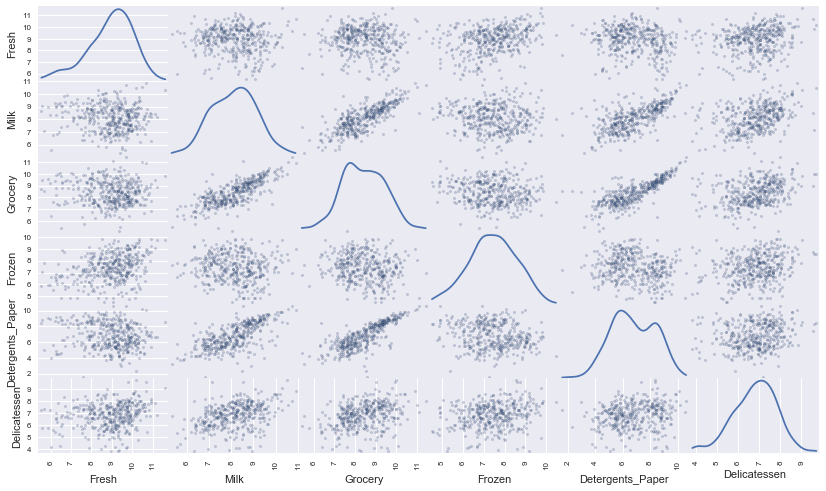

In [14]:
# Produce a scatter matrix without outliers... distribution appears more normal
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are 42 points in total that are considered outliers, based on Tukey's method for identifying outliers, all of which should be removed before proceeding with our analysis. 


My intuition told me that we needed to remove all the outliers since we would be using K-Means and needed to get as close to a normal distribution as we could get. Not getting rid of outliers would also affect the steps we would undergo with feature transformation. To confirm my intuition, I went ahead and tried removing different sets of outliers to understand how this would impact our silhouette_score. These were the results: 

    - Removed all outliers (42 data points): 0.4472
    - Removed all outliers EXCEPT the ones found in more than 1 category (37): 0.4377
    - Removed only outliers found in more than 1 category (5): 0.4263
    - Did not remove any outliers: 0.4192
    
The highest silhouette_score was obtained when we removed all the outliers, and decreased as we removed less and less outliers, confirming that removing all the outliers was a good decision.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

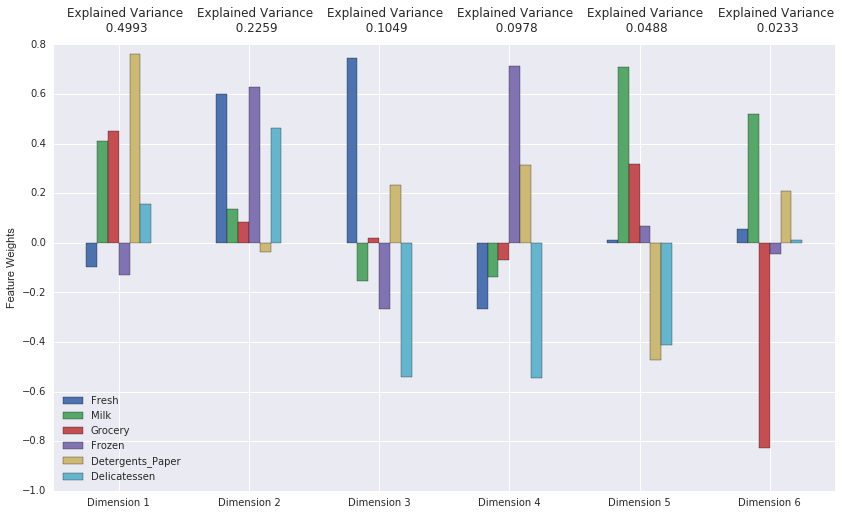

In [15]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca = pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

- The total variance explained by the two principal components is 72.52%.
- The total variance explained by the first four principal components is 92.79%.


The first principal component explains almost 50% of the variance mainly by considering a combination of Detergents_Paper, Grocery, and Milk (three features we saw earlier that might be strongly correlated). The second dimension mostly captures the variance in Fresh, Frozen, and Delicatessen products, adding an additional 22% to the explanation of the variance. The third and fourth dimensions of PCA show inverse relations mostly between Fresh and Delicatessen products, and Frozen and Delicatessen products, which, if added to our analysis would explain an additional 20% of the variance in the data.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.3980,2.8829,1.0725,0.9247,0.3976,-0.3645
1,2.6673,-0.7078,-1.5704,-0.7788,0.0226,0.2489
2,1.2348,-2.1440,2.9565,0.1912,0.6151,0.1202


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

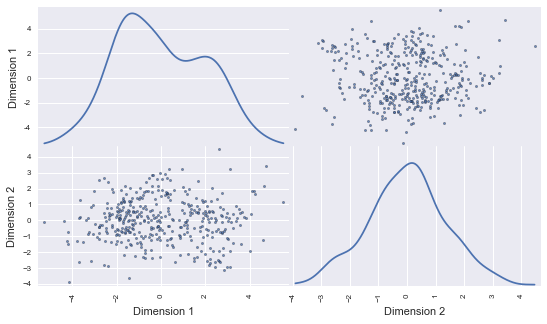

In [18]:
# idea for the code and visualization provided by the mentor in the review

# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (9,5), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.3980,2.8829
1,2.6673,-0.7078
2,1.2348,-2.1440


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**


**Advantages of K-Means:**
- If the number of variables is very large, K-Means might be computatinally faster. 
- It's simple to use and implement, and it works well with large datasets.
- Can produce tighter clusters than other algorithms


**Advantages of GMM:**
- Works well with multimodal distributions. 
- Unlike K-Means, it does not assume spherical clusters. 
- GMM assigns a *probability* of a point being in one cluster or another, instead of hard assignments to clusters.


Given what I observed about the customer data, I believe that in this particular case it would be safe to use either K-Means or GMM. Nevertheless, since we applied logarithmic scale to the data and removed all outliers, which resulted in normal (or very close to normal) distributions for all features, I will proceed to use K-Means for the remaining analysis. 


Sources of information: 
- http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm
- http://stats.stackexchange.com/questions/58855/why-do-we-use-k-means-instead-of-other-algorithms
- http://www.nehalemlabs.net/prototype/blog/2014/04/03/quick-introduction-to-gaussian-mixture-models-with-python/
- https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm
- https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/clustering/slides.pdf


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 2

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
clusterer = clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("{} => {}".format(n_clusters, score))

2 => 0.447157742293


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

These are the silhouette scores for different number of clusters. The best score is for n_clusters of 2. 

- 2 => 0.447157742293
- 4 => 0.331150954285
- 6 => 0.362761015127
- 8 => 0.377229204391
- 10 => 0.349565221424

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

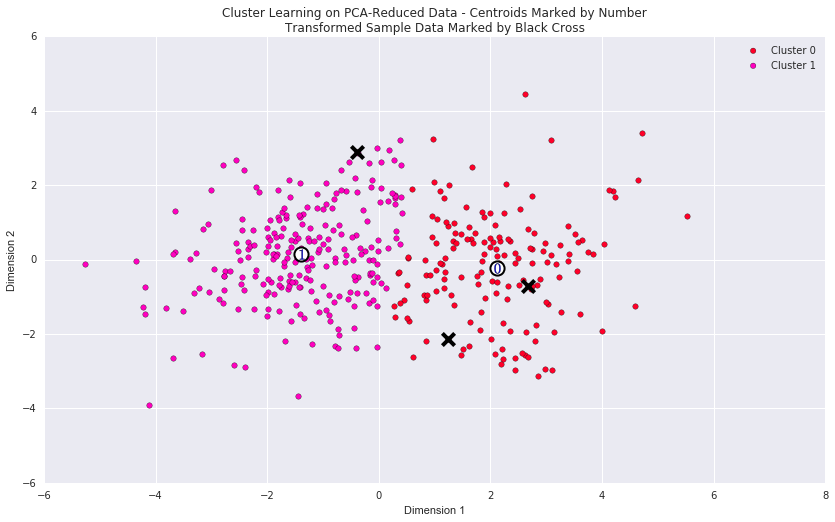

In [21]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [22]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

- The customers in segment 0 appear to have high value of goods purchase in both Grocery (+45% more than the mean for all customers) and Detergents_Paper (+52% more than the mean), giving us a hint that they are probably reselling these items to the public. Where do people go to buy Groceries and Detergents? To supermarkets or small stores.
- The customers in segment 1 purchase a lot of fresh and frozen products (in both cases, almost twice the amount of segment one), but buy very little Detergents_Paper (only 10% of the mean for all customers). Most likely these customers are using Detergents (and other Groceries) internally, but are selling Fresh and Frozen products to the public. These sound like places that serve food, like restaurants or cafeterias. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


(array([ 0.5,  1.5,  2.5]), <a list of 3 Text yticklabel objects>)

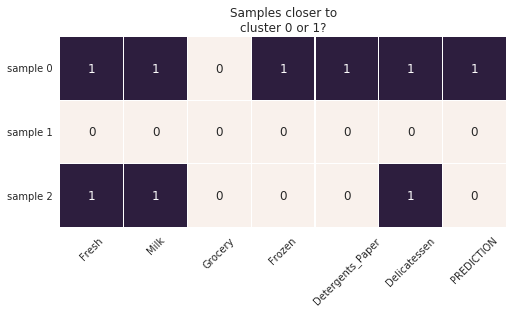

In [24]:
# idea for the code and visualization provided by the mentor in the review

# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples-true_centers.iloc[0]) < np.abs(samples-true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

# see how cluster predictions align with similariy of spending in each category
df_preds = pd.concat([df_diffs, pd.Series(sample_preds, name='PREDICTION')], axis=1)
sns.heatmap(df_preds, annot=True, cbar=False, yticklabels=['sample 0', 'sample 1', 'sample 2'], linewidth=.1, square=True)
plt.title('Samples closer to\ncluster 0 or 1?')
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0)

**Answer:**

Yes, the predictions are consistent with the sample points. For example:
- Most of the purchases of sample point 0 where of fresh products, and was assigned to Cluster 1. 
- Sample point 1 purchased a lot of groceries, detergents, papers, and delicatessen typical of points in Cluster 0. 
- From the visualization above, we see that the algorithm probably had a harder time deciding on which cluster should sample point 2 be, but in the end the weight assigned to groceries and detergents_paper where determinant on predicting this customer should be in Cluster 0.

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

It would be a good idea to run an A/B test and segment the data correctly. Reducing the frequency of delivering goods will most likely *affect* all customers, but not in the same degree. Looking at the customer segments above, those customers that rely on Fresh products in their daily business (the customers in Cluster 1) will definitely like it less, in the worst-case scenario, probably even triggering them to consider switching providers. Customers in Cluster 0 will not be happy about having fewer delivery days (since it will most likely have an impact in their financials: inventory, cash flow, etc.), but since they stock mostly products that don't expire (detergents, paper, etc.) or products that are not required to be fresh (groceries, etc.), they are less vulnerable to this change.


To prove this, we should run at least one A/B test for customers in Cluster 0 and another A/B test for customers in Cluster 1. In both cases, we should focus on modifying only the variable we are interested in, namely the delivery service. In both clusters we should have a control group (no changes to delivery service) and a test group (delivery service of 3 days a week). We would have to make sure that both the control and test group have a varied sample of the customers from the same Cluster, to avoid reaching the wrong conclusions. 


In general, after the A/B test is done, we would have to see if we have significant differences in customer retention, total spending by customer or average spending by customer between the control and
test groups for the A/B test in Cluster 0 and A/B test in Cluster 1. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

Making new classifications (predictions) would be just a matter of replicating some of the steps we did above. We would have to first save the pca and clusterer objects we generated above, clean the data (np.log, outliers, etc), call pca.transform on the cleaned data and finally call clusterer.predict with the transformed data to get our predictions. Every few weeks/months, depending on the number of datapoints received, we would have to update pca and clusterer objects to take into account the new data points.  

I would also tell the wholesaler to ask the customer directly for their type of activity. For example, does the customer consider itself a typical supermarket? A restaurant? A coffee shop? Something like the "Channel" information we removed in the first step of this notebook. With this information we could run a supervised learning algorithm (for example a decision tree), where the labels are the channels, try to predict if a new customer effectively belongs to that channel.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

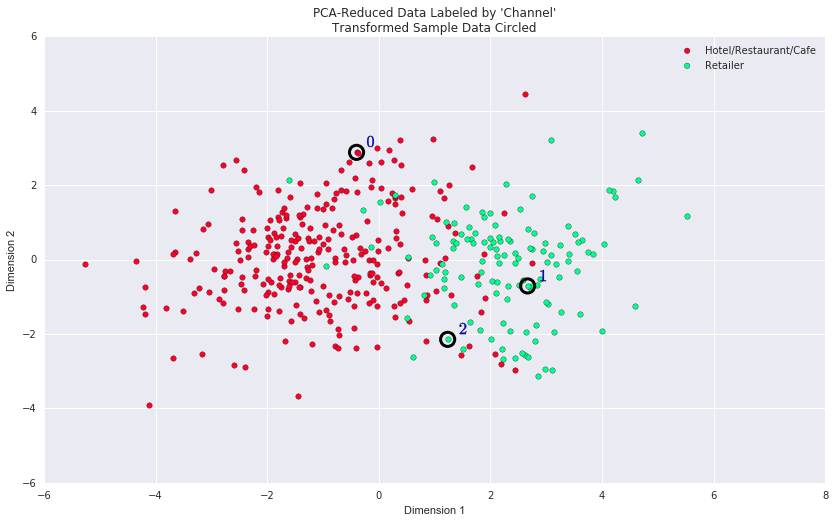

In [25]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

I would say the algorithm did a very good job of classifying the information, taking into account that we only took two dimensions, that explained only 72% of the variance. We see that there are some misclassifications in the middle, but this could be fixed by including 3 or 4 dimensions, instead of 2, for example. The segments description (Retailers vs Hotel/Restaurants/Cafes) are consistent with the findings of the analysis, and the sample customers are in clusters they should be. For example, sample point 0 (which purchases a lot of fresh goods) is in cluster 1 and member of the HoReCa channel, while sample point 1 (which purchases a lot o groceries and detergents) is in cluster 0 and member of the Retailer channel. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.